# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


This dataset is aggregated per census block.

So each row is a geographic region (a small neighborhood area), not one single home.

| column               | meaning                                                                  |
| -------------------- | ------------------------------------------------------------------------ |
| `longitude`          | geographic coordinate (west-east) of the region center                   |
| `latitude`           | geographic coordinate (north-south)                                      |
| `housing_median_age` | median age of houses in that region                                      |
| `total_rooms`        | *total number of rooms in ALL houses in that area combined*              |
| `total_bedrooms`     | same idea → sum of bedrooms in that area                                 |
| `population`         | number of people living in that block                                    |
| `households`         | number of households (groups of people) — like families                  |
| `median_income`      | median income of households (in tens of thousands $)                     |
| `median_house_value` | median price of house in that region (this is our target)                |
| `ocean_proximity`    | categorical label where region is geographically located (NEAR BAY, etc) |

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


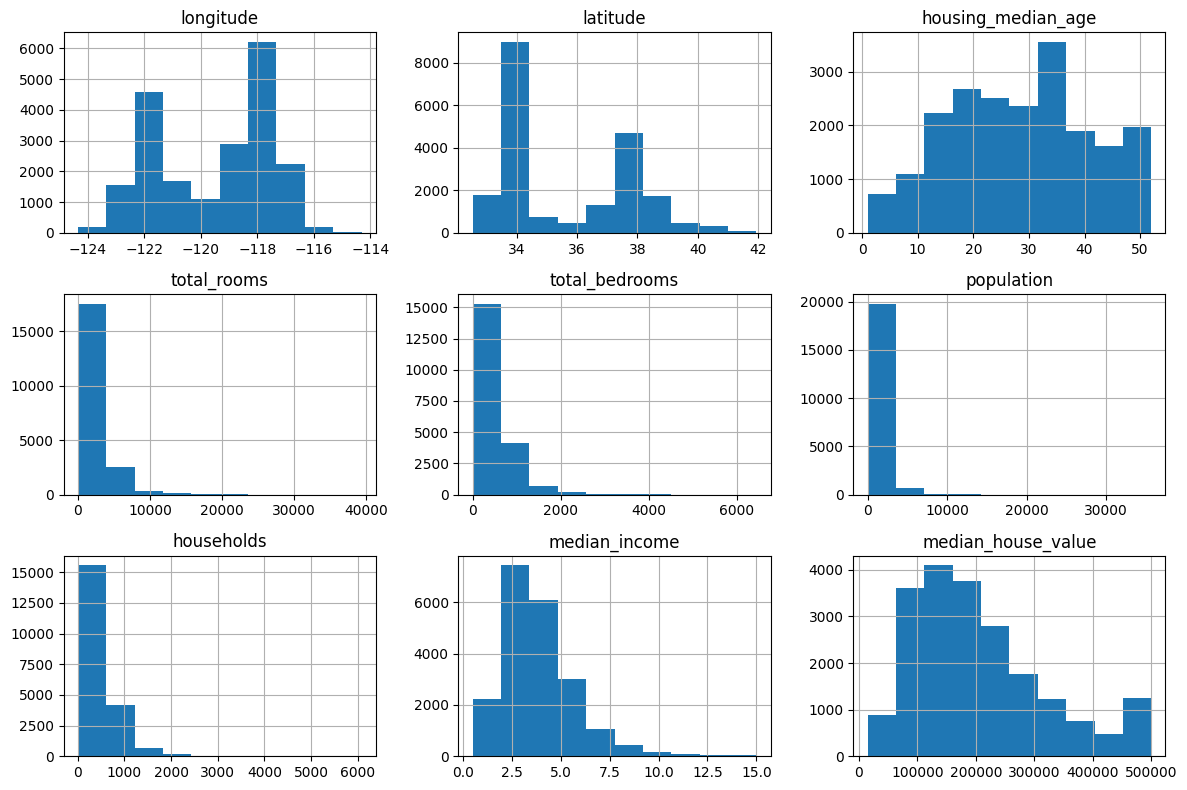

In [5]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

a histogram shows the distribution of values in a column.

think of it like:

“how many rows fall into each numeric range?”

what to get from histograms (for ML)

1. skewness:
many features are skewed — linear models like data that’s more symmetric
later we can transform if needed (log, etc.)

2. range differences:
some features have huge scales → standardization helps

3. target clipping (median_house_value ~500k):
the boundary means the dataset might not represent very expensive homes accurately.

why do we need a correlation matrix?

This is key to understanding which features are most useful for predicting our target (median_house_value).

Correlation tells us:

how strongly 2 variables move together

correlation value	meaning
+1	perfect positive linear relationship
-1	perfect negative linear relationship
0	no linear relationship

So:

if a feature has high (in absolute value) correlation with the target → it’s likely a good predictor.

For our case, we want to find features strongly related to median_house_value.

Example:

median_income is usually very strongly correlated with house price

If we see that “median_income” has correlation like ~0.7 — that means:
→ the higher the income, the higher the house price → good feature.

If a feature has near 0 correlation — it's not helpful for linear models (maybe useful for tree models though, but we’ll see later).

so which matters more?

1. for choosing model features → correlation matters

2. for understanding data shapes → histograms help

histograms show: data shape,
correlation shows: prediction potential

In [6]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [7]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [8]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
df.groupby("ocean_proximity")["median_house_value"].mean().sort_values(ascending=False)

ocean_proximity
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
<1H OCEAN     240084.285464
INLAND        124805.392001
Name: median_house_value, dtype: float64

In [11]:
features = ["median_income", "housing_median_age", "latitude", "longitude", "ocean_proximity"]